[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/algoritmos-poli/sesiones_presenciales/blob/main/clase15/notebooks/metodos_ordenamiento.ipynb) ![Built with AI](https://img.shields.io/badge/Built%20with-AI-blue.svg)

# Algoritmos de Ordenamiento y Análisis de Eficiencia

## Objetivos de Aprendizaje

Al finalizar esta sesión, el estudiante será capaz de:

* Comprender el funcionamiento de los algoritmos básicos de ordenamiento (Burbuja, Selección, Inserción) y algoritmos eficientes (Merge, Quick).
* Analizar la eficiencia temporal (complejidad) de cada algoritmo.
* Implementar y comparar experimentalmente estos algoritmos en Python.
* Justificar por qué existen diferencias de desempeño entre ellos.

## Evidencia de Aprendizaje

Para aprobar este laboratorio, deberás entregar este notebook completado, con las siguientes características:
1.  Todas las implementaciones de algoritmos funcionando correctamente.
2.  La tabla comparativa de tiempos de ejecución (Parte 5) debidamente diligenciada.
3.  Las preguntas de reflexión (Parte 5) respondidas, demostrando un análisis de los resultados.

## (Teoría) Parte 1: Conceptos Clave

### ¿Qué es el Ordenamiento?

El ordenamiento es el proceso de organizar una colección de elementos en un orden específico (ascendente, descendente, alfabético). Es una de las operaciones más fundamentales en las ciencias de la computación.

### ¿Cómo medimos la "eficiencia"?

En lugar de medir el tiempo (que depende del hardware), se mide la eficiencia contando el número de operaciones que realiza un algoritmo en función del tamaño de la entrada ($n$).

Esto se hace empleando la **Notación O Grande (Big O)** para describir la complejidad temporal en el peor de los casos.

* **$O(n^2)$ (Cuadrática):** Algoritmos "lentos". Si el tamaño de la entrada se duplica, el tiempo de ejecución se cuadruplica (aprox.).
* **$O(n \log n)$ (Log-Lineal):** Algoritmos "eficientes". Escalan mucho mejor que los cuadráticos.

In [1]:
# Importamos las librerías necesarias
import time     # Para medir el tiempo de ejecución
import random   # Para generar listas aleatorias
import sys      # Para ajustar el límite de recursión (útil para Quick Sort)
import matplotlib.pyplot as plt # Para graficar

# Aumentar el límite de recursión para listas grandes
sys.setrecursionlimit(5000)

# Importar YouTubeVideo para mostrar videos
from IPython.display import YouTubeVideo

## (Teoría y Práctica) Parte 2: Algoritmos $O(n^2)$

Estos algoritmos son simples de entender e implementar, pero no son eficientes para grandes volúmenes de datos.

### 2.1. Bubble Sort (Ordenamiento de Burbuja)

Este algoritmo compara repetidamente pares de elementos vecinos y los intercambia inmediatamente si están en el orden incorrecto. Los números "pesados" (grandes) "caen" al final. En el siguiente ejemplo se muestra el procedimiento de aplicación del algoritmo de burbuja aplicado al array [1, 5, 4, 2]:

| Pasada | Comparación | Acción | Resultado parcial |
|:-------:|:-------------:|:----------------:|:-----------------:|
| 1 | (5, 1) | Intercambia | [1, 5, 4, 2] |
| 1 | (5, 4) | Intercambia | [1, 4, 5, 2] |
| 1 | (5, 2) | Intercambia | [1, 4, 2, 5] |
| 2 | (1, 4) | No intercambia | [1, 4, 2, 5] |
| 2 | (4, 2) | Intercambia | [1, 2, 4, 5] |
| 3 | (1, 2) | No intercambia | [1, 2, 4, 5] |

A continuación se muestra la implementación en python de este algoritmo:

In [4]:
def bubble_sort(arr):
    n = len(arr)
    # Recorrer todos los elementos
    for i in range(n):
        # Un indicador para optimizar: si no hay intercambios, la lista ya está ordenada
        swapped = False

        # Los últimos i elementos ya están en su lugar
        for j in range(0, n - i - 1):
            # Comparar e intercambiar
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True

        # Si no hubo intercambios en esta pasada, terminar
        if not swapped:
            break
    return arr

# Prueba rápida
lista_prueba = [64, 34, 25, 12, 22, 11, 90]
print(f"Original: {lista_prueba}")
print(f"Ordenada: {bubble_sort(lista_prueba.copy())}")

Original: [64, 34, 25, 12, 22, 11, 90]
Ordenada: [11, 12, 22, 25, 34, 64, 90]


<a href="https://www.youtube.com/watch?v=lyZQPjUT5B4" target="_blank" style="text-decoration:none; color:inherit;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/YouTube_full-color_icon_%282017%29.svg/32px-YouTube_full-color_icon_%282017%29.svg.png" alt="YouTube Logo" style="width:32px; vertical-align:middle; margin-right:5px;">
    <strong>Algoritmo Bubble-sort</strong>
</a>

### 2.2. Selection Sort (Ordenamiento por Selección)

El algoritmo Selection Sort ordena una lista seleccionando repetidamente el elemento más pequeño (o más grande, según el orden) del subarreglo no ordenado y colocándolo en su posición correcta al inicio del arreglo. A continuación, se muestra el procedimiento de aplicación del algoritmo de selección aplicado al array [1, 5, 4, 2]:

| Pasada | Subarreglo considerado | Mínimo encontrado | Acción | Resultado parcial |
|:-------:|:----------------------:|:------------------:|:--------:|:-----------------:|
| 1 | [5, 1, 4, 2] | 1 | Intercambia (5 ↔ 1) | [1, 5, 4, 2] |
| 2 | [5, 4, 2] | 2 | Intercambia (5 ↔ 2) | [1, 2, 4, 5] |
| 3 | [4, 5] | 4 | No intercambia | [1, 2, 4, 5] |

In [1]:
def selection_sort(arr):
    n = len(arr)
    # Recorrer toda la lista
    for i in range(n - 1):
        # Encontrar el índice del mínimo elemento restante
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j

        # Intercambiar el mínimo encontrado con el primer elemento de la parte no ordenada
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

# Prueba rápida
lista_prueba = [64, 34, 25, 12, 22, 11, 90]
print(f"Original: {lista_prueba}")
print(f"Ordenada: {selection_sort(lista_prueba.copy())}")

Original: [64, 34, 25, 12, 22, 11, 90]
Ordenada: [11, 12, 22, 25, 34, 64, 90]


<a href="https://www.youtube.com/watch?v=Ns4TPTC8whw" target="_blank" style="text-decoration:none; color:inherit;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/YouTube_full-color_icon_%282017%29.svg/32px-YouTube_full-color_icon_%282017%29.svg.png" alt="YouTube Logo" style="width:32px; vertical-align:middle; margin-right:5px;">
    <strong>Algoritmo Selection-sort</strong>
</a>

### 2.3. Insertion Sort (Ordenamiento por Inserción)

El algoritmo Insertion Sort ordena una lista insertando cada elemento en su posición correcta dentro de la parte ya ordenada del arreglo. El proceso recorre el arreglo de izquierda a derecha, y en cada paso:
1. Toma el elemento actual como clave.
2. Lo compara con los elementos anteriores.
3. Desplaza hacia la derecha aquellos que son mayores que la clave.
4. Inserta la clave en la posición adecuada.

De esta manera, el subarreglo izquierdo queda ordenado en cada iteración.

La siguiente tabla muestra la prueba de escritorio aplicando este metodo de ordenamiento al array [1,5,4,2]:

| Pasada | Clave | Subarreglo ordenado antes de insertar | Comparaciones y movimientos | Resultado parcial |
|:-------:|:------:|:------------------------------------:|:-----------------------------|:-----------------:|
| 1 | 1 | [5] | 1 < 5 → desplaza 5, inserta 1 | [1, 5, 4, 2] |
| 2 | 4 | [1, 5] | 4 < 5 → desplaza 5, inserta 4 | [1, 4, 5, 2] |
| 3 | 2 | [1, 4, 5] | 2 < 5 → desplaza 5; 2 < 4 → desplaza 4; inserta 2 | [1, 2, 4, 5] |


In [ ]:
def insertion_sort(arr):
    # Empezamos desde el segundo elemento (índice 1)
    for i in range(1, len(arr)):
        key = arr[i] # El elemento a insertar
        j = i - 1    # El último índice de la parte ordenada

        # Mover los elementos de la parte ordenada que son mayores que 'key'
        # una posición hacia adelante
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1

        # Insertar 'key' en su posición correcta
        arr[j + 1] = key
    return arr

# Prueba rápida
lista_prueba = [64, 34, 25, 12, 22, 11, 90]
print(f"Original: {lista_prueba}")
print(f"Ordenada: {insertion_sort(lista_prueba.copy())}")

Original: [64, 34, 25, 12, 22, 11, 90]
Ordenada: [11, 12, 22, 25, 34, 64, 90]


<a href="https://www.youtube.com/watch?v=ROalU379l3U" target="_blank" style="text-decoration:none; color:inherit;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/YouTube_full-color_icon_%282017%29.svg/32px-YouTube_full-color_icon_%282017%29.svg.png" alt="YouTube Logo" style="width:32px; vertical-align:middle; margin-right:5px;">
    <strong>Algoritmo Insertion-sort</strong>
</a>

## (Teoría y Práctica) Parte 3: Algoritmos Eficientes $O(n \log n)$

Estos algoritmos utilizan técnicas más avanzadas (como "Divide y Vencerás") para lograr una eficiencia mucho mayor.

El **Merge Sort** es un algoritmo de ordenamiento por mezcla que implementa la estrategia de **divide y vencerás**.  
Su funcionamiento se basa en **dividir el problema en partes más pequeñas**, resolverlas de forma independiente y luego **combinarlas** para obtener el resultado final ordenado.

El proceso se desarrolla en las siguientes fases:

1. **Dividir:** el arreglo se separa en dos mitades aproximadamente iguales.  
2. **Ordenar:** cada mitad se ordena recursivamente aplicando el mismo algoritmo.  
3. **Combinar:** las dos mitades ordenadas se fusionan (*merge*) comparando los elementos uno a uno hasta formar un solo arreglo ordenado.

La siguiente tabla muestra la **prueba de escritorio** que ilustra el funcionamiento del algoritmo para el arreglo [5, 1, 4, 2]:

```
                     [5, 1, 4, 2]
                    /            \
                 [5, 1]        [4, 2]
                 /    \        /    \
               [5]    [1]    [4]    [2]
                 \    /        \    /
                 [1, 5]        [2, 4]
                    \            /
                     [1, 2, 4, 5]
```



In [ ]:
def merge_sort(arr):
    if len(arr) > 1:
        # 1. Dividir
        mid = len(arr) // 2
        L = arr[:mid] # Mitad izquierda
        R = arr[mid:] # Mitad derecha

        # Recursión para seguir dividiendo
        merge_sort(L)
        merge_sort(R)

        # 2. Vencer (Fusionar)
        i = j = k = 0 # Índices para L, R y arr

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        # Copiar elementos restantes de L (si los hay)
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        # Copiar elementos restantes de R (si los hay)
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

# Prueba rápida
lista_prueba = [64, 34, 25, 12, 22, 11, 90]
print(f"Original: {lista_prueba}")
print(f"Ordenada: {merge_sort(lista_prueba.copy())}")

Original: [64, 34, 25, 12, 22, 11, 90]
Ordenada: [11, 12, 22, 25, 34, 64, 90]


<a href="https://www.youtube.com/watch?v=XaqR3G_NVoo" target="_blank" style="text-decoration:none; color:inherit;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/YouTube_full-color_icon_%282017%29.svg/32px-YouTube_full-color_icon_%282017%29.svg.png" alt="YouTube Logo" style="width:32px; vertical-align:middle; margin-right:5px;">
    <strong>Algoritmo Merge-sort</strong>
</a>

### 3.2. Quick Sort

El Quick Sort (Ordenamiento Rápido) es, al igual que Merge Sort, un algoritmo que emplea la estrategia de "Divide y Vencerás".

Su funcionamiento se basa en particionar el arreglo en lugar de simplemente "dividirlo" por la mitad.

**Pasos Generales**:
1. **Elegir un Pivote**: Se selecciona un elemento del arreglo (el "pivote").
2. **Particionar**: Se reorganiza (particiona) el arreglo de modo que todos los elementos menores que el pivote queden a su izquierda, y todos los mayores queden a su derecha. En este paso, el pivote queda "colocado" en su posición final y correcta.
3. **Recursión (Vencer)**: Se aplica el mismo algoritmo (Quick Sort) de forma recursiva a las dos sub-listas resultantes (la de la izquierda del pivote y la de la derecha).

La principal diferencia con Merge Sort es que Quick Sort hace el trabajo antes de las llamadas recursivas (al particionar), mientras que Merge Sort hace el trabajo después (al fusionar).

En la siguiente figura se representa el algoritmo para el ordenamiento del arreglo [5,1,4,2]:

```
                     [5, 1, 4, 2]
                          |
                 pivot =  5
                /          \
       [1, 4, 2]            []
            |
      pivot =  1
      /         \
    []          [4, 2]
                   |
             pivot =  4
             /         \
          [2]           []
                   ↓
               [2, 4]
            ↓
        [1, 2, 4]
     ↓
 [1, 2, 4, 5]
```

In [ ]:
def quick_sort(arr):
    # Implementación simple (no la más eficiente en espacio, pero clara)
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2] # Elegir un pivote (ej. el del medio)
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]

        return quick_sort(left) + middle + quick_sort(right)

# Prueba rápida
lista_prueba = [64, 34, 25, 12, 22, 11, 90]
print(f"Original: {lista_prueba}")
print(f"Ordenada: {quick_sort(lista_prueba.copy())}")

Original: [64, 34, 25, 12, 22, 11, 90]
Ordenada: [11, 12, 22, 25, 34, 64, 90]


<a href="https://www.youtube.com/watch?v=ywWBy6J5gz8" target="_blank" style="text-decoration:none; color:inherit;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/YouTube_full-color_icon_%282017%29.svg/32px-YouTube_full-color_icon_%282017%29.svg.png" alt="YouTube Logo" style="width:32px; vertical-align:middle; margin-right:5px;">
    <strong>Algoritmo Quick-sort</strong>
</a>

## (Laboratorio) Parte 4: Comparación Experimental

Ahora vamos a medir el desempeño de nuestros algoritmos. Usaremos la librería `time` para cronometrar cuánto tarda cada uno en ordenar listas de diferentes tamaños.

In [20]:
def generar_lista_aleatoria(tamano):
    """Genera una lista de 'tamano' con números aleatorios entre 1 y 10000."""
    return [random.randint(1, 10000) for _ in range(tamano)]

def medir_tiempo(algoritmo, lista):
    """Mide el tiempo de ejecución de un algoritmo de ordenamiento."""
    # Hacemos una copia para no modificar la original y no afectar a otros algos
    lista_copia = lista.copy()

    start_time = time.time()
    algoritmo(lista_copia)
    end_time = time.time()

    return end_time - start_time

### 4.1. Demostración Rápida: $O(n^2)$ vs $O(n \log n)$

Como demostración, veamos la diferencia abismal entre Bubble Sort y Merge Sort con una lista de tamaño mediano (ej. 10,000 elementos).

In [19]:
# Generamos una lista de 10,000 elementos
lista_demo = generar_lista_aleatoria(10000)

print("Iniciando prueba con 10,000 elementos...\n")

# Prueba con Bubble Sort (O(n^2))
print("Probando Bubble Sort (puede tardar)...")
tiempo_bubble = medir_tiempo(bubble_sort, lista_demo)
print(f"Bubble Sort tardó: {tiempo_bubble:.4f} segundos")

# Prueba con Merge Sort (O(n log n))
print("\nProbando Merge Sort...")
tiempo_merge = medir_tiempo(merge_sort, lista_demo)
print(f"Merge Sort tardó: {tiempo_merge:.4f} segundos")

# Prueba con Quick Sort (O(n log n))
print("\nProbando Quick Sort...")
tiempo_quick = medir_tiempo(quick_sort, lista_demo)
print(f"Quick Sort tardó: {tiempo_quick:.4f} segundos")

# Prueba con el sort() nativo de Python (Timsort)
print("\nProbando list.sort() nativo...")
lista_copia = lista_demo.copy()
start_time = time.time()
lista_copia.sort()
end_time = time.time()
print(f"Python .sort() tardó: {(end_time - start_time):.6f} segundos")

Iniciando prueba con 10,000 elementos...

Probando Bubble Sort (puede tardar)...
Bubble Sort tardó: 8.5326 segundos

Probando Merge Sort...
Merge Sort tardó: 0.0287 segundos

Probando Quick Sort...
Quick Sort tardó: 0.0202 segundos

Probando list.sort() nativo...
Python .sort() tardó: 0.002247 segundos


## 5. Aplicaciones prácticas de los algoritmos de ordenamiento en la vida cotidiana

Aunque los algoritmos de ordenamiento se estudian principalmente en el ámbito de la programación, su lógica está presente en **muchas situaciones de la vida diaria** donde organizamos información o elementos según un criterio.  

A continuación se presentan algunos ejemplos que ilustran cómo estos algoritmos se aplican de forma práctica:

### 5.1. Organización de objetos o tareas
- Cuando ordenamos **libros en una estantería** por autor, título o color, estamos aplicando la misma lógica que un **Insertion Sort**, colocando cada libro en su posición correcta.
- Al organizar una **lista de tareas** de la más urgente a la menos importante, usamos una estrategia similar a **Selection Sort**, seleccionando el próximo elemento más relevante.

### 5.2. Clasificación digital de información
- Las aplicaciones de correo electrónico (como Gmail) **ordenan los mensajes** por fecha o prioridad usando algoritmos como **Merge Sort** o **Quick Sort** para hacerlo rápidamente.
- En las **listas de reproducción** o catálogos de música, los temas se ordenan alfabéticamente o por duración con el mismo principio.

#### 5.3. Compras y comercio electrónico
- En tiendas en línea como Amazon o Mercado Libre, los productos se **ordenan por precio, calificación o relevancia**, aplicando variantes optimizadas de **Quick Sort** y **Heap Sort**.
- También se emplean algoritmos de ordenamiento para mostrar los **productos más vendidos o más recientes** en la parte superior.

#### 5.4. Redes sociales y contenido en línea
- Plataformas como Instagram, TikTok o YouTube **ordenan las publicaciones** según su relevancia o nivel de interacción. Este proceso se basa en algoritmos que **ordenan datos** (por likes, comentarios o tiempo de publicación) para decidir qué mostrar primero.
- Cuando filtras los mensajes más recientes o las tendencias del día, el sistema ejecuta procesos de **ordenamiento interno** sobre millones de datos.

### 5.5. Transporte y navegación
- Aplicaciones como Google Maps **ordenan rutas** según la distancia o el tiempo estimado, usando algoritmos que combinan ordenamiento con búsqueda eficiente.
- En plataformas de transporte (Uber, Didi), se **ordenan conductores disponibles** por cercanía antes de asignar el viaje.

### 5.6. Educación y calificaciones
- Al generar **listados de estudiantes ordenados por promedio** o puntaje, se usan algoritmos de ordenamiento.
- También, en pruebas estandarizadas, los resultados se **clasifican de mayor a menor** para análisis estadístico.

>  **En resumen:**  
Los algoritmos de ordenamiento no solo viven dentro del código: cada vez que organizamos, clasificamos o priorizamos algo en la vida real, estamos aplicando los mismos principios lógicos que usan las computadoras para poner datos en orden.

## (Laboratorio) Parte 6: Actividad de Evaluación

### 6.1. Tabla Comparativa de Tiempos

**Instrucciones:** Ejecuta todos los algoritmos (Bubble, Selection, Insertion, Merge, Quick) para los tamaños de lista indicados y completa la siguiente tabla con los tiempos de ejecución en segundos.

**Advertencia:** Los algoritmos $O(n^2)$ pueden tardar *mucho* tiempo (varios minutos) en listas de 10,000 o 50,000 elementos. Sé paciente o considera omitir esas celdas si tardan demasiado.

In [21]:
# Tamaños de listas a probar
tam_listas = [100, 500, 1000, 5000, 10000]

# Diccionario para guardar los resultados
resultados = {}

algoritmos = {
    "Bubble Sort": bubble_sort,
    "Selection Sort": selection_sort,
    "Insertion Sort": insertion_sort,
    "Merge Sort": merge_sort,
    "Quick Sort": quick_sort
}

print("Iniciando mediciones... Esto puede tardar.")

for tam in tam_listas:
    print(f"\n--- Probando con N = {tam} ---")
    lista_grande = generar_lista_aleatoria(tam)
    resultados[tam] = {}

    for nombre_algo, func_algo in algoritmos.items():
        tiempo = medir_tiempo(func_algo, lista_grande)
        resultados[tam][nombre_algo] = tiempo
        print(f"{nombre_algo}: {tiempo:.6f} segundos")

print("\nMediciones completadas.")

Iniciando mediciones... Esto puede tardar.

--- Probando con N = 100 ---
Bubble Sort: 0.000496 segundos
Selection Sort: 0.000263 segundos
Insertion Sort: 0.000199 segundos
Merge Sort: 0.000154 segundos
Quick Sort: 0.000154 segundos

--- Probando con N = 500 ---
Bubble Sort: 0.016536 segundos
Selection Sort: 0.006147 segundos
Insertion Sort: 0.005576 segundos
Merge Sort: 0.001158 segundos
Quick Sort: 0.000890 segundos

--- Probando con N = 1000 ---
Bubble Sort: 0.052696 segundos
Selection Sort: 0.024287 segundos
Insertion Sort: 0.023508 segundos
Merge Sort: 0.001808 segundos
Quick Sort: 0.001781 segundos

--- Probando con N = 5000 ---
Bubble Sort: 1.493140 segundos
Selection Sort: 0.649631 segundos
Insertion Sort: 0.676639 segundos
Merge Sort: 0.011791 segundos
Quick Sort: 0.009660 segundos

--- Probando con N = 10000 ---
Bubble Sort: 8.118731 segundos
Selection Sort: 2.609940 segundos
Insertion Sort: 2.670217 segundos
Merge Sort: 0.026505 segundos
Quick Sort: 0.020416 segundos

Medicio

<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-2740402432.py:17: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(tam_listas, data_plot["Merge Sort"], label="Merge Sort $O(n \log n)$", marker='s')
/tmp/ipython-input-2740402432.py:18: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(tam_listas, data_plot["Quick Sort"], label="Quick Sort $O(n \log n)$", marker='s')
/tmp/ipython-input-2740402432.py:29: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(tam_listas, data_plot["Merge Sort"], label="Merge Sort $O(n \log n)$", marker='s')
/tmp/ipython-input-2740402432.py:30: SyntaxWarning: invalid escape 

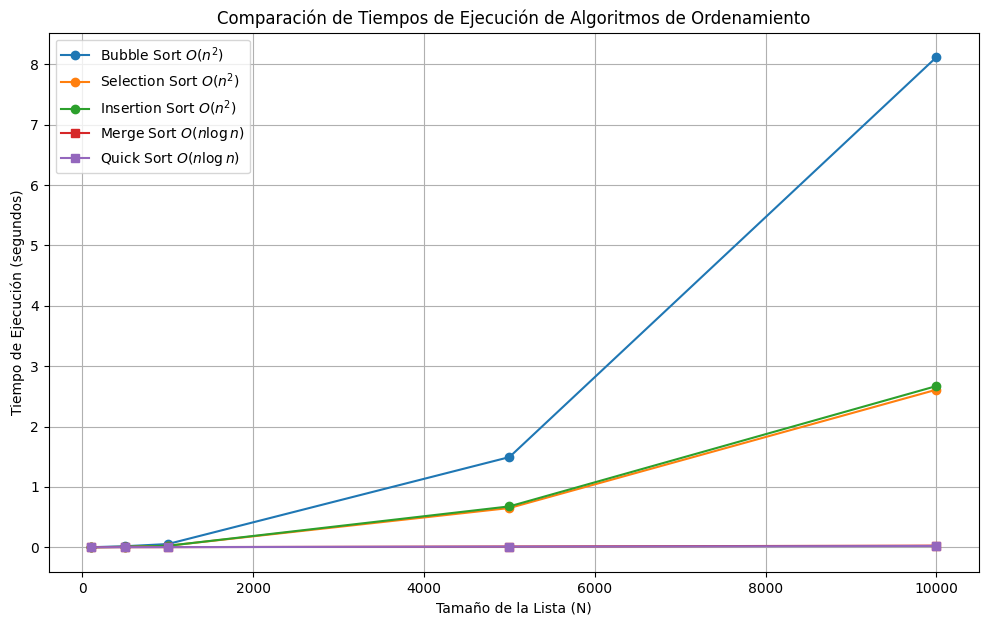

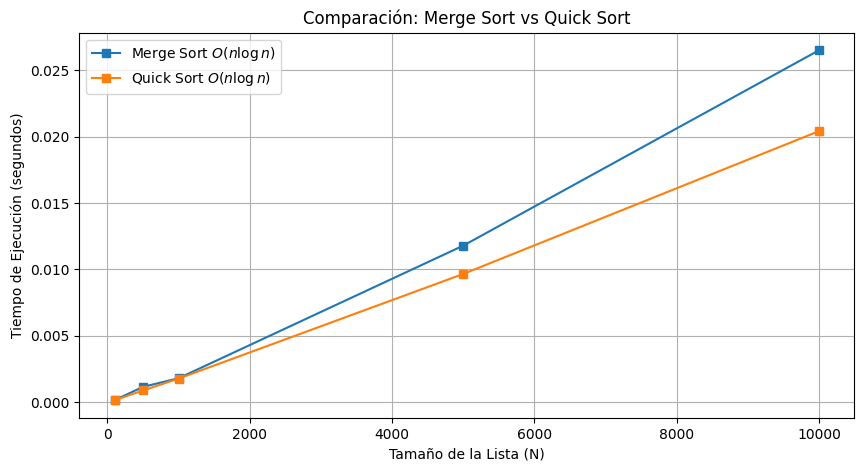

In [22]:
# (Opcional, pero recomendado) Visualizar los resultados

# Preparar datos para la gráfica
data_plot = {nombre: [] for nombre in algoritmos}
for tam in tam_listas:
    for nombre in algoritmos:
        data_plot[nombre].append(resultados[tam][nombre])

plt.figure(figsize=(12, 7))

# Graficar O(n^2)
plt.plot(tam_listas, data_plot["Bubble Sort"], label="Bubble Sort $O(n^2)$", marker='o')
plt.plot(tam_listas, data_plot["Selection Sort"], label="Selection Sort $O(n^2)$", marker='o')
plt.plot(tam_listas, data_plot["Insertion Sort"], label="Insertion Sort $O(n^2)$", marker='o')

# Graficar O(n log n)
plt.plot(tam_listas, data_plot["Merge Sort"], label="Merge Sort $O(n \log n)$", marker='s')
plt.plot(tam_listas, data_plot["Quick Sort"], label="Quick Sort $O(n \log n)$", marker='s')

plt.title("Comparación de Tiempos de Ejecución de Algoritmos de Ordenamiento")
plt.xlabel("Tamaño de la Lista (N)")
plt.ylabel("Tiempo de Ejecución (segundos)")
plt.legend()
plt.grid(True)
plt.show()

# (Opcional) Graficar solo los rápidos para ver la diferencia entre ellos
plt.figure(figsize=(10, 5))
plt.plot(tam_listas, data_plot["Merge Sort"], label="Merge Sort $O(n \log n)$", marker='s')
plt.plot(tam_listas, data_plot["Quick Sort"], label="Quick Sort $O(n \log n)$", marker='s')
plt.title("Comparación: Merge Sort vs Quick Sort")
plt.xlabel("Tamaño de la Lista (N)")
plt.ylabel("Tiempo de Ejecución (segundos)")
plt.legend()
plt.grid(True)
plt.show()

### 5.2. Tabla de Resultados (PARA COMPLETAR POR EL ESTUDIANTE)

Diligencia esta tabla con los resultados (en segundos) obtenidos en la celda "Datos para la Tabla".

| Tamaño (N) | Bubble Sort | Selection Sort | Insertion Sort | Merge Sort | Quick Sort |
| :--- | :--- | :--- | :--- | :--- | :--- |
| 100 | *<tu_tiempo>* | *<tu_tiempo>* | *<tu_tiempo>* | *<tu_tiempo>* | *<tu_tiempo>* |
| 500 | *<tu_tiempo>* | *<tu_tiempo>* | *<tu_tiempo>* | *<tu_tiempo>* | *<tu_tiempo>* |
| 1000 | *<tu_tiempo>* | *<tu_tiempo>* | *<tu_tiempo>* | *<tu_tiempo>* | *<tu_tiempo>* |
| 5000 | *<tu_tiempo>* | *<tu_tiempo>* | *<tu_tiempo>* | *<tu_tiempo>* | *<tu_tiempo>* |
| 10000 | *<tu_tiempo>* | *<tu_tiempo>* | *<tu_tiempo>* | *<tu_tiempo>* | *<tu_tiempo>* |

### 5.3. Análisis y Reflexión (PARA COMPLETAR POR EL ESTUDIANTE)

Responde las siguientes preguntas basándote en los resultados obtenidos:

**Pregunta 1:** ¿Qué observas en la diferencia de tiempo entre los algoritmos $O(n^2)$ (Bubble, Selection, Insertion) y los $O(n \log n)$ (Merge, Quick) a medida que $N$ aumenta?
**Respuesta:** *(Escribe tu análisis aquí)*

**Pregunta 2:** ¿Por qué crees que los algoritmos $O(n^2)$ se vuelven tan lentos tan rápidamente? Relaciona tu respuesta con la cantidad de comparaciones o bucles anidados que tienen.
**Respuesta:** *(Escribe tu análisis aquí)*

**Pregunta 3:** Compara Merge Sort y Quick Sort. ¿Cuál fue generalmente más rápido en tus pruebas? ¿Por qué crees que el `.sort()` nativo de Python fue el más rápido de todos? (Pista: investiga sobre Timsort).
**Respuesta:** *(Escribe tu análisis aquí)*

**Pregunta 4 (Conclusión):** En un escenario profesional, te piden ordenar 1 millón de registros de usuarios. ¿Qué algoritmo usarías y por qué (justifica tu respuesta usando la complejidad)?
**Respuesta:** *(Escribe tu análisis aquí)*

## Referencias y Bibliografía

* Cormen, T., Leiserson, C., Rivest, R., & Stein, C. (2022). Introduction to Algorithms (4th Ed.).
* Sedgewick, R. & Wayne, K. (2017). Algorithms, 4th Edition.
* Documentación oficial de Python (sorting).